In [4]:
import numpy as np # linear algebra
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import shutil
from glob import glob
# Helper libraries
import matplotlib.pyplot as plt
import math
%matplotlib inline
print(tf.__version__)

2.11.0


In [6]:
ROOT_DIR="/kaggle/input/shai-level-2-training-2023"
PATH_TRAIN_COVID ="/kaggle/input/shai-level-2-training-2023/train/covid"
PATH_TRAIN_NORMAL = "/kaggle/input/shai-level-2-training-2023/train/normal"
PATH_TRAIN_VIRUS = "/kaggle/input/shai-level-2-training-2023/train/virus"

PATH_TEST ="/kaggle/input/shai-level-2-training-2023/test"

In [39]:
PATH_NORMAL_LIST = glob(os.path.join(PATH_TRAIN_NORMAL,"*.jpeg"))
PATH_VIRUS_LIST = glob(os.path.join(PATH_TRAIN_VIRUS,"*.jpeg"))
PATH_COVID_LIST = glob(os.path.join(PATH_TRAIN_COVID,"*.png"))
PATH_COVID_LIST.extend(glob(os.path.join(PATH_TRAIN_COVID,"*.jpeg")))


In [40]:
covid = {'class': 'CT_COVID',
         'path': PATH_TRAIN_COVID,
         'images': PATH_COVID_LIST}

non_covid = {'class': 'CT_NonCOVID',
             'path': PATH_TRAIN_NORMAL,
             'images': PATH_NORMAL_LIST}

virus = {'class': 'CT_VIRUS',
             'path': PATH_TRAIN_VIRUS,
             'images': PATH_VIRUS_LIST}

In [41]:
total_positive_covid = len(PATH_COVID_LIST)
total_normal = len(PATH_NORMAL_LIST)
total_virus = len(PATH_VIRUS_LIST)

print(f"Total number of covid19 images are {total_positive_covid}")
print(f"Total number of normal images are {total_normal}")
print(f"Total number of virus images  are {total_virus}")

Total number of covid19 images are 244
Total number of normal images are 468
Total number of virus images  are 433


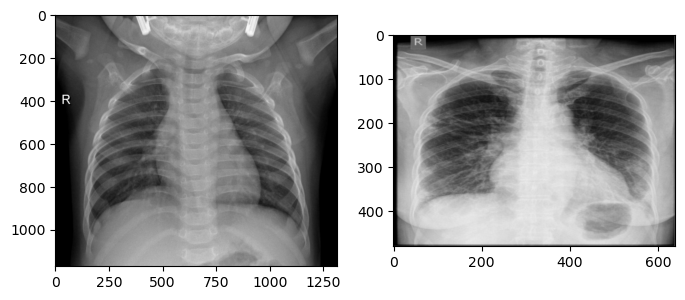

In [47]:
image_positive = cv2.imread(os.path.join(PATH_COVID_LIST[1]))
image_negative = cv2.imread(os.path.join(PATH_NORMAL_LIST[1]))

image_virus = cv2.imread(os.path.join(PATH_VIRUS_LIST[1]))
f = plt.figure(figsize=(8, 8))
f.add_subplot(1, 2, 1)
plt.imshow(image_negative)
f.add_subplot(1,2, 2)
plt.imshow(image_positive)

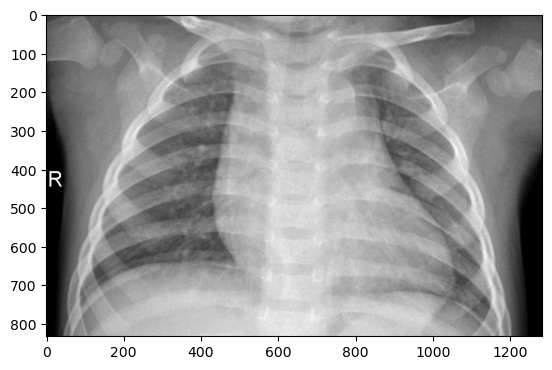

In [49]:
f.add_subplot(2,1,1)
plt.imshow(image_virus)